## Chi-Squared Analysis

### First Question: Did more women and childen survive compared to men?

Dataset from Canvas (Titanic_Passenger_List.csv)

In [14]:
import pandas as pd

passenger_df = pd.read_csv('../data/titanic_crew_passenger_list/Titanic Passenger List.csv')

passenger_df.head()

,Name,Born,Died,Age,Gender,Class/Dept,Ticket,Fare,Cabin,Joined,Occupation,Survived?,Boat,Body,Nationality,URL
0,"ABBING, Mr Anthony",1870.0,1912.0,41,Male,3rd Class Passenger,5547,£7 11s,NaN,Southampton,Blacksmith,LOST,NaN,NaN,American,https://www.encyclopedia-titanica.org/titanic-...
1,"ABBOTT, Mr Eugene Joseph",1899.0,1912.0,13,Male,3rd Class Passenger,CA2673,£20 5s,NaN,Southampton,Scholar,LOST,NaN,NaN,American,https://www.encyclopedia-titanica.org/titanic-...
2,"ABBOTT, Mr Rossmore Edward",1896.0,1912.0,16,Male,3rd Class Passenger,CA2673,£20 5s,NaN,Southampton,Jeweller,LOST,NaN,190.0,"English, American",https://www.encyclopedia-titanica.org/titanic-...
3,"ABBOTT, Mrs Rhoda Mary 'Rosa'",1873.0,1946.0,39,Female,3rd Class Passenger,CA2673,£20 5s,NaN,Southampton,NaN,SAVED,A,NaN,English,https://www.encyclopedia-titanica.org/titanic-...
4,"ABELSETH, Miss Kalle (Karen) Marie Kristiane",1895.0,1969.0,16,Female,3rd Class Passenger,348125,£7 13s,NaN,Southampton,NaN,SAVED,16,NaN,Norwegian,https://www.encyclopedia-titanica.org/titanic-...


In [3]:
# Margins = true will show the summary.
contingency_table = pd.crosstab(passenger_df['Gender'], passenger_df['Survived?'], margins = True)
print(contingency_table)

Survived?  LOST  SAVED   All
Gender                      
Female      127    339   466
Male        690    161   851
All         817    500  1317


Text(0.5, 1.0, 'Survival Rate By Gender')

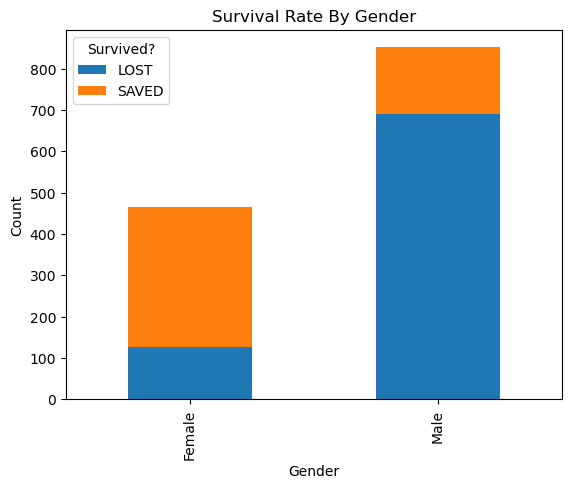

In [10]:
# Task: Create a stacked bar chart showing the number of passenger by gender that lived or died
import matplotlib.pyplot as plt
# Exclude the last column and row (summary info)

# For plottin, do not include the margins = True.
contingency_table.iloc[:-1, :-1].plot(kind = 'bar', stacked = True)
plt.ylabel("Count")
plt.title("Survival Rate By Gender")

In [11]:
from scipy import stats # For chi2_contingency

print(stats.chi2_contingency(contingency_table)[0:3])

# You get 3 values back:
# 1) Chi_Squared: The higher the chi-squared statisitics, the less likelihood that the observed values were the result of pure chance.
# 2) Target P-Value
# 3) Degrees Of Freedom: 1 degree of freedom. (r rows -1) * (r columns -1) = 1

(370.44475889139227, 6.744885060500017e-79, 4)


## Chi-Square Example: Was Age Relevant?

In [19]:
# Check the age column. It is already fixed for the age at the time of the incident.
passenger_df['Age'] = pd.to_numeric(passenger_df['Age'], errors='coerce')

# What about null values?
passenger_df = passenger_df.dropna(subset=['Age'])

# Create the bins
passenger_df['age_bins'] = pd.cut(x = passenger_df['Age'], bins = [0, 10, 20, 30, 40, 50, 60, 70, 80])

contingency_table = pd.crosstab(passenger_df['age_bins'], passenger_df['Survived?'])
print(contingency_table)
print(f'Chi2-Stats {stats.chi2_contingency(contingency_table)[0:3]}')


Survived?  LOST  SAVED
age_bins              
(0, 10]      43     47
(10, 20]    153     71
(20, 30]    286    166
(30, 40]    155    107
(40, 50]    109     64
(50, 60]     36     30
(60, 70]     26      7
(70, 80]      5      0
Chi2-Stats (21.372501839640798, 0.003256226034804983, 7)


<Axes: ylabel='Frequency'>

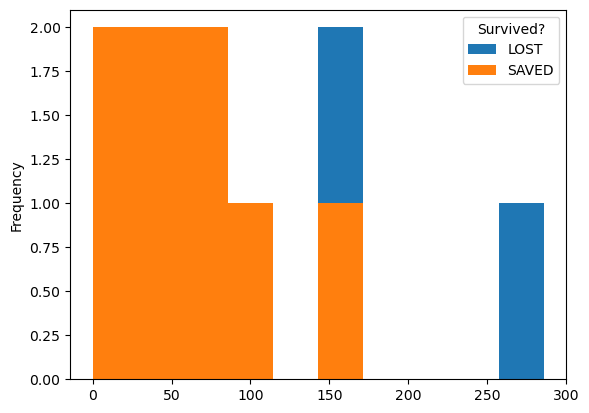

In [26]:
contingency_table.plot(kind = 'hist')

C:\Users\draco\AppData\Local\Temp\ipykernel_10584\3799541853.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  passenger_df.groupby(['age_bins', 'Survived?']).size().unstack().plot(kind = 'bar', stacked = False)


Text(0.5, 1.0, 'Survival Rate Based on Age Group')

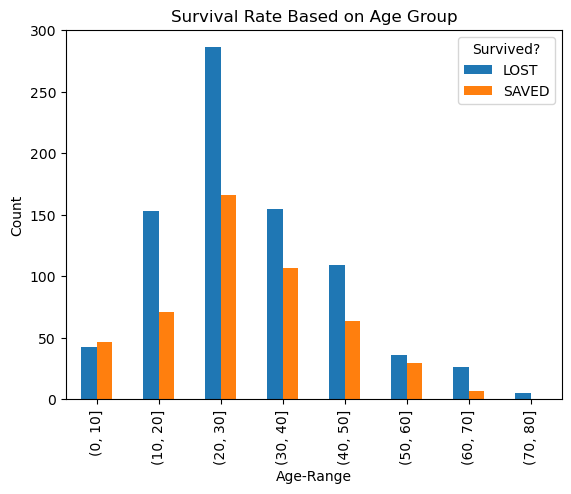

In [30]:
passenger_df.groupby(['age_bins', 'Survived?']).size().unstack().plot(kind = 'bar', stacked = False)
plt.ylabel('Count')
plt.xlabel('Age-Range')
plt.title('Survival Rate Based on Age Group')

C:\Users\draco\AppData\Local\Temp\ipykernel_10584\1516160450.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = passenger_df.groupby(['age_bins', 'Survived?']).size().unstack()


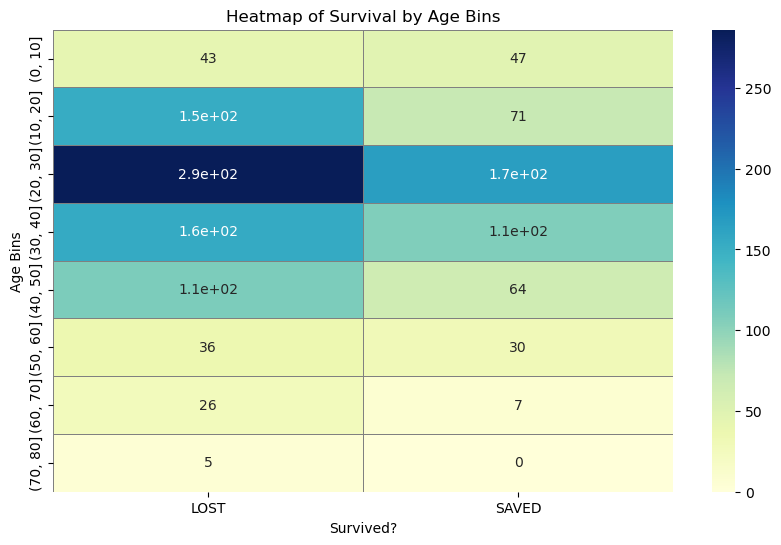

In [36]:
import seaborn as sns

# Assuming passenger_df is already defined
grouped_data = passenger_df.groupby(['age_bins', 'Survived?']).size().unstack()

# Create the heatmap plot
plt.figure(figsize=(10, 6))
sns.heatmap(grouped_data, annot=True, cmap='YlGnBu', linewidths=0.5, linecolor='gray')

plt.title('Heatmap of Survival by Age Bins')
plt.xlabel('Survived?')
plt.ylabel('Age Bins')
plt.show()